*The code snippet assumes Anaconda 5.2.0 version of Python virtual environment*

<div class="alert alert-info">
    <h4>Acknowledgement</h4>
    <p>Some materials on this post are from <a href="http://web.stanford.edu/class/cs224n/">CS224n: Natural Language Processing with Deep Learning</a> at the Standford University.</p>
    <p>Check out the YouTube Lecture on <a href="https://www.youtube.com/watch?v=kEMJRjEdNzM&list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&index=2">Word Vectors and Word Senses</a> taught by <a href="https://nlp.stanford.edu/~manning/">Dr. Chris Manning</a>.</p>
</div>

One of the critical components in Natural Langauge Processing (NLP) is to encode text information in a numerical format that can be fed into an NLP model. Such technique, representing words in a numerical vector space, is called **Vector Space Modeling**. It is often synonymous to *word embedding*. A typical vector space model that haven't went through dimensional reduction has a dimension of $V \times N$, where $V$ is a size of unique vocabulary, and $N$ varies based on the choice of modeling method (*notes: in document-to-word embedding model like TF-IDF, $V$ is a number of documents and and $N$ is a size of unique vocabulary*). In this context, $V$ is basically a sample data size — the larger the $V$, the bigger the training data set. It is always good to have more training data than the otherwise. Not much more to talk about it. Therefore, our prime interest lies within the size of $N$, which affects the multi-dimensionality of a vector space model.

### Review on Vector Space Model Techniques

Before we talk about the significance of the size of $N$, let us review how text information is transformed into a numerical matrix. Please feel free to skip this part if you are already knowledgable about this topic. 

The below table lists some options we have for word embedding. For illustration purpose, Co-Occurence Matrix and Word2Vec will be used.

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Frequency-Based Methods</th>
         <th class="text-center">Prediction-Based Methods</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">Count Vector</td>
         <td class="text-center">Continuous Bag of words</td>
      </tr>
      <tr>
         <td class="text-center">TF-IDF</td>
         <td class="text-center">Doc2Vec</td>
      </tr>       
      <tr>
          <td class="text-center"><b>Co-Occurence Matrix</b></td>
          <td class="text-center"><b>Word2Vec</b></td>
      </tr>
   </tbody>
</table>

There are two types of methods for word embedding: *Frequency-Based Methods* and *Prediction-Based Methods*. Frequency-based methods are pretty straightforward to understand. It counts how many times each word appeared in each document, or how many times each word appeared together with each words. 

**Co-Occurence Matrix**

The value of $N$ for co-occurence matrix is the size of unique vocabulary. In the other words, co-occurence matrix is a square matrix of size $V \times V$. 

Consider a co-occurence matrix with fixed window size of $n=1$. Setting window size $n=1$ will tell the model to search adjacent context words that are positioned directly left or right of a center word. The matrix is contructed using the following two input documents:

*Document 1: "all that glitters is not gold"*

*Document 2: "all is well that ends well"*

|     *    | START | all | that | glitters | is   | not  | gold  | well | ends | END |
|----------|-------|-----|------|----------|------|------|-------|------|------|-----|
| START    | 0     | 2   | 0    | 0        | 0    | 0    | 0     | 0    | 0    | 0   |
| all      | 2     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 0    | 0   |
| that     | 0     | 1   | 0    | 1        | 0    | 0    | 0     | 1    | 1    | 0   |
| glitters | 0     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 0    | 0   |
| is       | 0     | 1   | 0    | 1        | 0    | 1    | 0     | 1    | 0    | 0   |
| not      | 0     | 0   | 0    | 0        | 1    | 0    | 1     | 0    | 0    | 0   |
| gold     | 0     | 0   | 0    | 0        | 0    | 1    | 0     | 0    | 0    | 1   |
| well     | 0     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 1    | 1   |
| ends     | 0     | 0   | 1    | 0        | 0    | 0    | 0     | 1    | 0    | 0   |
| END      | 0     | 0   | 0    | 0        | 0    | 0    | 1     | 1    | 0    | 0   |

**Simple Co-Occurence**

No pre-processing:
1. remove non-standard punctuations (`, ')
2. Converting $5 to 5 DOLLARS
3. Splitting hyphenated or concatenated words that does not appear in a dictionary
4. Automatic Spelling Correction

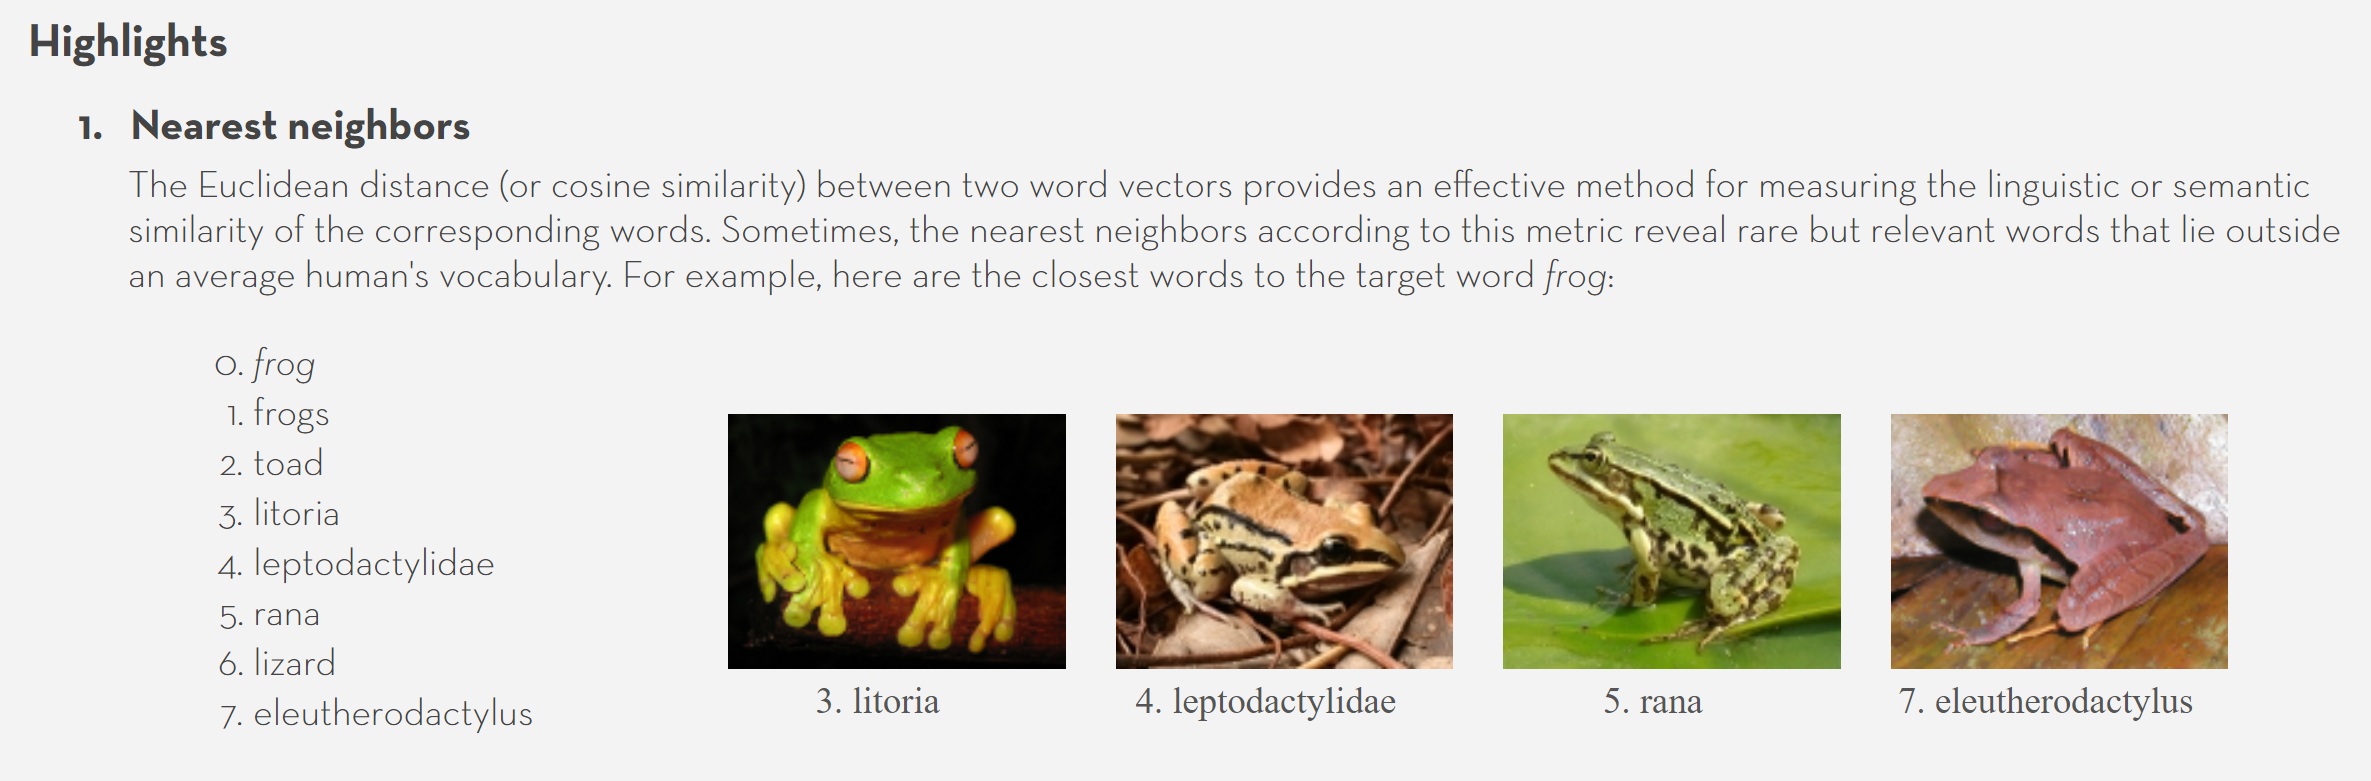

Issues with Co-occurence matrix:

Co-occurence matrix captures syntatic types - because of the location of words. 

Increase in size with Vocabulary
High dimensional - lots of memory (big issue) - sparse matrix - dynamic hash
Sparsity issues 
Common words, like 'a', 'the' are also counted - can be solved with text pre-processing
>>> Dimensional reduction is necessary - leaving only the columns with the highest explained variance. In this way, the most informative columns can be retained.

How to choose dimension? -> explained_variance.

Limitations - can't capture complex patterns beyond word similiary (word2Vec can) - fix = set limit, min(X, y), t~~ 100

Disproportionate importance given to large counts

HAL table - improved co-occurence matrix. Weighting based on window distance.


**Nearest Neighbors**

Paper says that Minkowski-2, or Euclidean distance is used. 

**Visualizatoin Idea**

More similar words should have more similar vectors - draw boxed-lines with counts.

Choose 2 principle components from 3-4 reduced dimensions. 

**COALS**

Rather than removing columns based on variance, remove columns with low-frecuency, because they are like noise. 

Pearson's Correlation Matrix - rather than counting the raw rate of word-pair co-occurence, consider the conditional rate. That is, does word b occur more or less often in the vicinity of word a than it does in general?

Correlation coefficient => -1 ~ +1
Correlation = 0 => no correlation
Correlation = 0 => strongly correlated

Because of the large corpus, it is rare for a correlation coeff to be greater than 0.01. About 80% correlation are negative, infact. We ignore negative correlated coffecient. This also has the effect of making the matrix sparser, because the negative values will be replaced with 0, and helps with SVD later. 

Then the values are square rooted to amplify the correlation. This square rooting is not based on mathematical principles, but rather empirical way that showed improved performance (according to the paper)

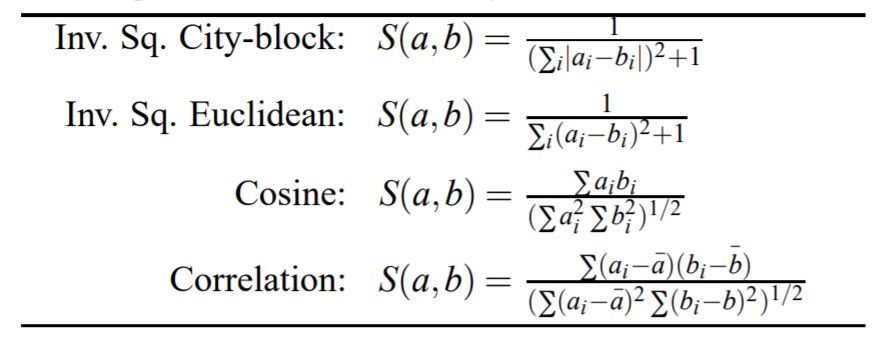

Instead of Cosine, for COALS we use correlation, as they are more sensitive to correlation. After all, the equations for both are the same except that the mean value is subtracted. The semantic similarity between two words is given
by the correlation of their vectors. 

Discard all but m (14,000) most-frequent columns reflecting the most common open-class words and then run SVD (but remove stopwords before).

The paper found out that using 600-800 dimensions were good (but this was because the corpus included every possible words, not specific to a certain topic)

Then perform SVD to reduce the dimension to k. 

The nearest neighbors in COALS are the ones with the largest correlation.

In short, the changes that lead to the improved performance of COALS over HAL are, in order of importance,
the normalization of columns through the conversion to
word-pair correlations, ignoring negative values and taking the square roots of correlations to reduce the influence
of large values, using the correlation similarity measure,
using a narrower window, not distinguishing between left
and right neighbors, and ignoring closed class columns.

Choosing dimensions are different for each projects.

**Polysemy**

Rigorous work is being done on this part.https://stackoverflow.com/questions/51330549/using-word2vec-for-polysemy-solving-problems

**GloVe vs Word2Vec**

https://www.quora.com/What-are-the-advantages-and-disadvantages-of-Word2vec-and-GloVe

**One line implementation for co-occurence matrix**

https://www.pingshiuanchua.com/blog/post/keyword-network-analysis-with-python-and-gephi

**PCA vs T-SNE**

https://www.datacamp.com/community/tutorials/introduction-t-sne

https://stats.stackexchange.com/questions/238538/are-there-cases-where-pca-is-more-suitable-than-t-sne

PCA is a linear technique. This means PCA doesn’t interpret complex polynomial relationships. t-SNE, on the other hand, can find the structure within such complex data. t-SNE, on the other hand, preserves only local similarities and small pairwise distances.

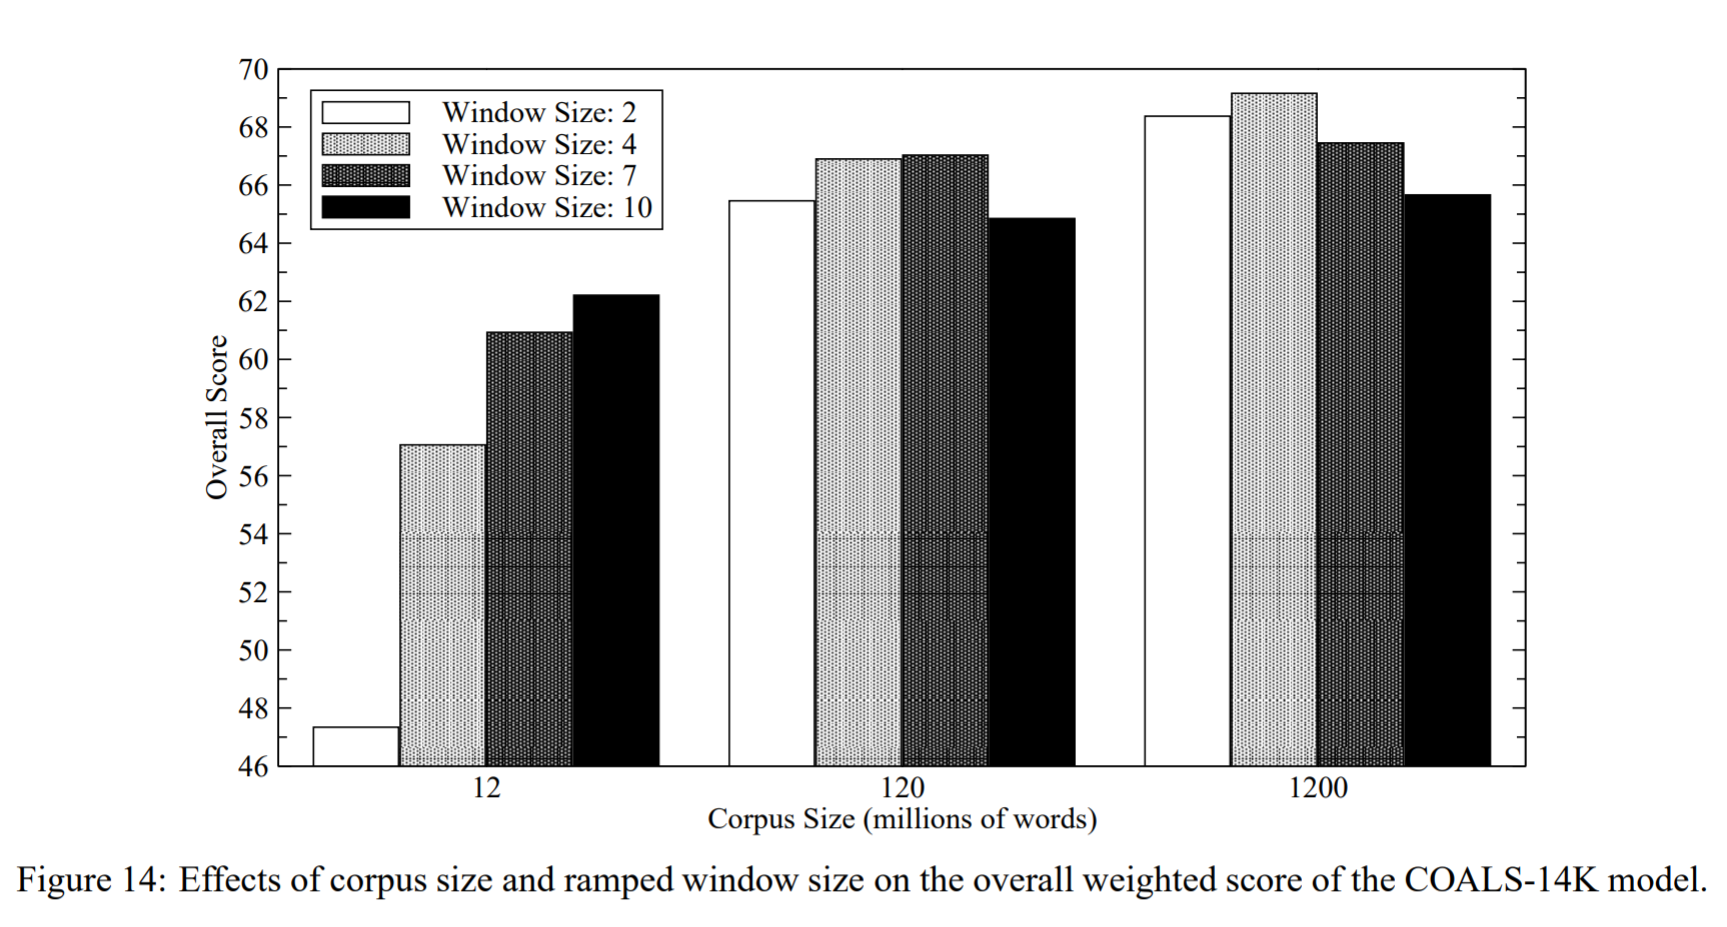

Choice of window size - too large window produces noise.

**GloVe vs Word2Vec**

https://www.quora.com/What-are-the-advantages-and-disadvantages-of-Word2vec-and-GloVe

**One line implementation for co-occurence matrix**

https://www.pingshiuanchua.com/blog/post/keyword-network-analysis-with-python-and-gephi

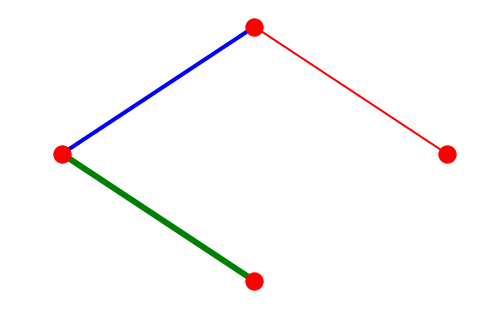

In [7]:
import networkx as nx

G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=6)

pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, edge_color=colors, width=weights)

## Understanding Multi-Dimensionality in Vector Space Modeling

https://papers.nips.cc/paper/7368-on-the-dimensionality-of-word-embedding.pdf

Summary 
1. Dimension is a critical parameter in word embedding. To low dim = not expressive enough to capture all possible word relations. Too high dim = overfitting. Dim affects the quality of the model.

2. Dimension directly affects the comtutational cost.

3. Some ppl decide the dimension empirically. This isn't good due to 1) increased time 2) doesn't test all possibility 3) lack of consensus in different performance tests. 

4. Latent Semantic Analysis (LSA) uses SVD based on co-occurence statistics

As
a critical hyper-parameter, the choice of dimensionality for word vectors has huge influence on the
performance of a word embedding. First, it directly impacts the quality of word vectors - a word
embedding with a small dimensionality is typically not expressive enough to capture all possible
word relations, whereas one with a very large dimensionality suffers from over-fitting. 

 Second,
the number of parameters for a word embedding or a model that builds on word embeddings (e.g.
recurrent neural networks) is usually a linear or quadratic function of dimensionality, which directly
affects training time and computational costs. Therefore, large dimensionalities tend to increase
model complexity, slow down training speed, and add inferential latency, all of which are constraints
that can potentially limit model applicability and deployment [Wu et al., 2016].

some researchers is to first train many embeddings of different dimensionalities, evaluate them on a
functionality test (like word relatedness or word analogy), and then pick the one with the best empirical performance. However, this method suffers from 1) greatly increased time complexity and
computational burden, 2) inability to exhaust all possible dimensionalities and 3) lack of consensus
between different functionality tests as their results can differ. 



In [ ]:
https://www.quora.com/Is-word-embedding-word2vec-a-type-of-vector-space-model

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 



something = STOPWORDS
something.add('START')
something.add('END')
something.add('None')
something.add('said')
something.add('will')
something.add('pct')

text = 'i am something something'

def generate_wordcloud(text, stopwords=something): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(background_color="white",width=4000, height=2000,
                          stopwords = stopwords
                          ).generate(joined)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.savefig('wordcloud.png', dpi=300)

generate_wordcloud(text)